# Hands-on introduction to ML training
In this notebook we will train a simple Linear Regression model to predict the SAT score of a student given their GPA.

 **Linear Regression** is a type of Supervised Learning where the ML model is trained by feeding in data with right answers, so it can learn to give correct answers for new inputs it hasn't seen before.

### Step 1: Load and explore data
The first step is figuring out the data source. In this case we will use a pre-existing dataset. We will:
1. Create a folder 'data'
2. Download the file from public github repo using python package "requests" and save the `SAT_GPA.csv` file in the data folder.


In [1]:
import os

try:
    os.mkdir('data')
except OSError as error:
    print(error)

import requests, csv

url = 'https://raw.githubusercontent.com/techno-nerd/ML_Course/main/01%20Introduction/data/SAT_GPA.csv'
r = requests.get(url)
with open('data/SAT_GPA.csv', 'w') as f:
  writer = csv.writer(f)
  for line in r.iter_lines():
    writer.writerow(line.decode('utf-8').split(','))

[Errno 17] File exists: 'data'


Now we will use a popular python package "pandas" to load and process the data. To learn more about pandas, watch this [video](https://www.youtube.com/watch?v=vmEHCJofslg).

In [2]:
import pandas as pd

data = pd.read_csv('data/SAT_GPA.csv')

Now the entire SAT_GPA.csv content has been loaded into 'data' variable (Pandas DataFrame). It's time to **explore this data**



In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SAT Score  181 non-null    int64  
 1   GPA        181 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.0 KB
None


This data has two columns, "SAT Score" and "GPA". Overall there are 181 rows (index 0 to 180). All the values in the two columns are non-null.

In [4]:
# print first five rows (index 0, 1, 2, 3 and 4)
print(data[:5])

   SAT Score  GPA
0       1600  4.0
1       1593  4.0
2       1587  4.0
3       1580  4.0
4       1573  4.0


In [5]:
# print useful stats like mean, min, max, ... for each column
print(data.describe())

         SAT Score         GPA
count   181.000000  181.000000
mean   1000.000000    2.617901
std     349.293573    1.559243
min     400.000000    0.000000
25%     700.000000    1.390000
50%    1000.000000    3.370000
75%    1300.000000    3.970000
max    1600.000000    4.000000


**Visualise the Data**
Visualising the data is often a big part of data exploration. As they say, a picture is worth a thousand words.

We will use a popular python package "matplotlib" to create the visualisations. You can learn about matplotlib in detail from this [video](https://www.youtube.com/watch?v=OZOOLe2imFo)

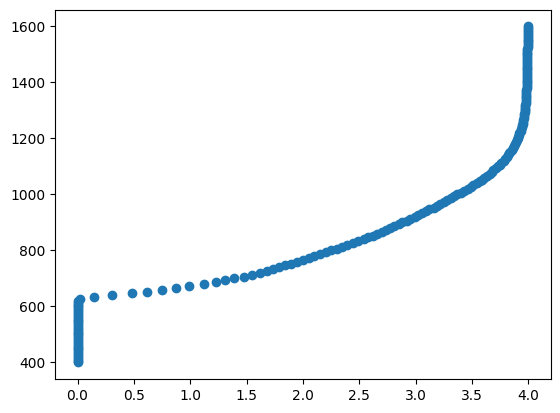

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(data['GPA'], data['SAT Score'])
plt.show()

GPA is on the x-axis and SAT Score is on the y-axis
There are quite a few rows with GPA = 0, that looks fishy. For now we will ignore that and move to the next step: Data Preparation and Feature Engineering

### Step 2: Data preparation and feature engineering

In this introductory exercise, we will do absolute bare minimum data prep / feature eng work.

We will simply:
1. Split the data (181 rows) into training set (80%) and test set (20%)
2. Separate the input features ("GPA") from target variable ("SAT Score")

We will use "numpy", another popular python package to prepare these data sets (as numpy arrays) that will then be fed into the ML model.

We will use scikit-learn (sklearn), a popular Python package that provides tools for simple and efficient machine learning

In [7]:
# Split the data
# 0.2 = random 20% data points (rows) will be used for test-set
# train_features and train_labels will be used to train the ML model
# test_features and test_labels will be used to test the quality of the learnt model

import sklearn.model_selection as ms
import numpy as np

train_features, test_features, train_labels, test_labels = ms.train_test_split(data['GPA'], data['SAT Score'], test_size=0.2)
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(144,)
(37,)
(144,)
(37,)


In [8]:
print(type(train_features))

<class 'pandas.core.series.Series'>


In [9]:
if type(train_features) != 'numpy.ndarray':
    train_features, test_features, train_labels, test_labels = train_features.to_numpy(), test_features.to_numpy(), train_labels.to_numpy(), test_labels.to_numpy()

In [10]:
train_features = np.reshape(train_features, (144, 1))
print(train_features.shape)
print(train_features[:3])

(144, 1)
[[3.98]
 [3.92]
 [3.99]]


In [11]:
test_features = np.reshape(test_features, (37, 1))
print(test_features.shape)

(37, 1)


### Step 3: Model Selection and Training

We will use one of the simplest ML model for this problem: Linear Regression

In [12]:
#Train the model (its simpler than you think)
from sklearn import linear_model as lm

regr = lm.LinearRegression()
regr = regr.fit(train_features, train_labels)

That's it! Model Trained!
Often in ML, the actual model training part is a very small portion of total work involved.

In [13]:
#Evaluate the performance
from sklearn.metrics import mean_squared_error as mse

train_predictions = regr.predict(train_features)

print("TRAIN Root Mean Squared Error: %.2f" %
      (mse(train_labels, train_predictions)**0.5))

TRAIN Root Mean Squared Error: 131.74


### Step 4: Model evaluation and tuning
The error reported above is based on the training set. That is the same set on which the model was trained, hence it is NOT a good indicator of model performance.

Goal of model training is not to do well only on the training set (seen examples). Goal is to "learn the patterns from the training data" such that model can "do well on unseen examples". That is why we created a separate test_set and did not feed those data points as part of model training. Hence the data points in the test_set are "not seen" by the model as yet.

In [14]:
test_predictions = regr.predict(test_features)

print("TEST Root Mean Squared Error: %.2f"
      % (mse(test_labels, test_predictions)**0.5))

TEST Root Mean Squared Error: 142.53


In [21]:
# We will learn more about RMSE eval metric in a following session

# Below we are using the model to make a prediction
# Try it yourself: replace 3.94 with any GPA you want to enter

gpa = np.reshape([4.0], (1,1))
SAT_pred = int(regr.predict(gpa))
print(SAT_pred)

1289


Model Visualisation
Linear Regression model trained on a "single input feature" (in this case "GPA") is a straight line

In [16]:
x = train_features
w = regr.coef_
b = regr.intercept_

y = w*x + b
# this can also be written as "y = mx + c", equation of a line

/var/folders/hc/_rm2mjw14y9_r7933xkcw3p80000gn/T/ipykernel_20637/2686573392.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "c" (-> color=(0.0, 0.75, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'c', linewidth=2, color='red')


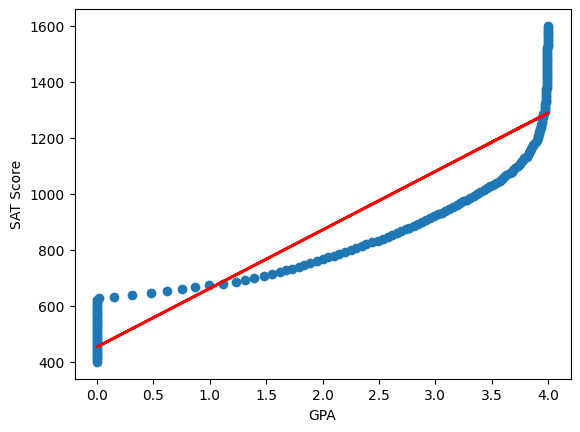

In [17]:
plt.scatter(data['GPA'], data['SAT Score'])
plt.plot(x, y, 'c', linewidth=2, color='red')
plt.xlabel('GPA')
plt.ylabel('SAT Score')

plt.show()

The performance of this model does not seem spectacular, but this will be fixed in the next lesson

## Congratulations on training your first ML model